# Árboles de decisión
**Juliho Castillo Colmenares**

¡Bienvenidos a la actividad práctica del módulo! 

Antes de empezar

El objetivo de esta actividad es que efectúes un análisis de clasificación mediante Árboles de decisión que permita desarrollar un modelo predictivo basado en distintas métricas aplicadas a una base de datos grande.

Entregable: Un Jupyter Notebook (archivo de extensión .ipynb), archivo PDF y capturas de pantalla en el espacio de respuesta que muestren tanto el código desarrollado como la solución al problema planteado, incluyendo los comentarios que sean pertinentes a las preguntas que se plantean. Entregas sin estos elementos no serán calificadas.

¡Buena suerte!

Problema:   Imagina que eres un investigador médico que recopila datos para un estudio. Has recopilado datos sobre un conjunto de pacientes, todos ellos con la misma enfermedad. Durante su tratamiento, cada paciente ha respondido a uno de los 5 medicamentos, el fármaco A, el fármaco B, el fármaco c, el fármaco X y el Y. 

Parte de tu trabajo consiste en construir un modelo para averiguar qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad. Los conjuntos de características de este conjunto de datos son la edad, el sexo, la presión arterial y el colesterol de los pacientes, y el objetivo es estudiar el fármaco al que respondió cada paciente. 

Se trata de un ejemplo de clasificador binario, y se puede utilizar la parte de entrenamiento del conjunto de datos para construir un árbol de decisión, y luego utilizarlo para predecir la clase de un paciente desconocido, o para prescribirlo a un nuevo paciente.

Variable a pronosticar:

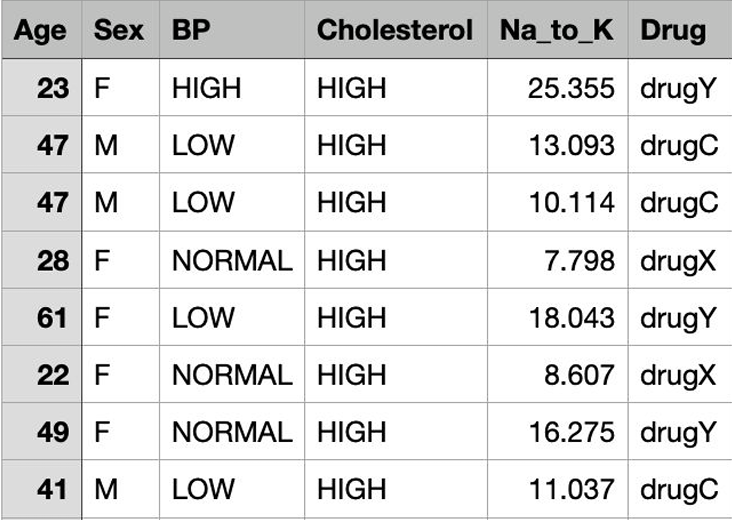

Paso a paso:

Cargue la base de datos “drugs.csv” en Python e investigue cómo convertir las variables predictoras cualitativas de esta base a una escala numérica mediante la instrucción “preprocessing.LabelEncoder()”. Por ejemplo, si una variable tiene 3 posibles categorías, deberá cambiar sus resultados a 0, 1 o 2. 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("drugs.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [14]:
X = df.drop("Drug", axis=1)
y = df["Drug"]

In [15]:
from preprocess import create_preprocessing_pipeline

preprocess_pipeline = create_preprocessing_pipeline(
    categorical_variables=["Sex", "BP", "Cholesterol"], 
    numerical_variables=["Age", "Na_to_K"]
    )

In [16]:
X_preprocessed = preprocess_pipeline.fit_transform(X)

In [17]:
preprocessor = preprocess_pipeline.named_steps['preprocessor']
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OrdinalEncoder(),
                                 ['Sex', 'BP', 'Cholesterol']),
                                ('num', StandardScaler(), ['Age', 'Na_to_K'])])

In [18]:

feature_names = preprocessor.get_feature_names_out()
feature_names

array(['cat__Sex', 'cat__BP', 'cat__Cholesterol', 'num__Age',
       'num__Na_to_K'], dtype=object)

In [19]:
ordinal_encoder = preprocessor.transformers_[0][1]
categories = ordinal_encoder.categories_
categories

[array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object)]

Use el método de Árboles de decisión para generar un modelo predictivo para este problema. Pruebe con los dos criterios vistos en esta lección (Gini y Entropía) y diversos niveles de profundidad. En cada caso elabore un reporte de clasificación detallado. Interprete verbalmente sus indicadores y determine cuál es la mejor opción.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


# Definir el espacio de búsqueda de parámetros
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, None],
    'random_state': [42]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV
grid_search.fit(X_preprocessed, y)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)


Mejores parámetros: {'criterion': 'gini', 'max_depth': 4, 'random_state': 42}
Mejor puntuación: 0.985


In [21]:
model = DecisionTreeClassifier(**grid_search.best_params_)
model.fit(X_preprocessed, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

Explique verbalmente las reglas del árbol propuesto al momento de pronosticar.

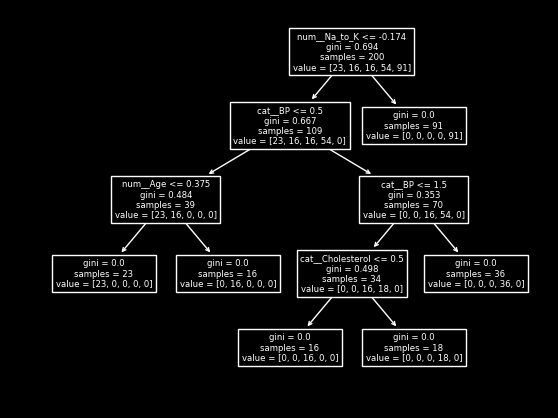

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model, feature_names=feature_names) 
plt.show()

¿Qué medicamento recomendaría utilizar para un paciente con los siguientes datos? 

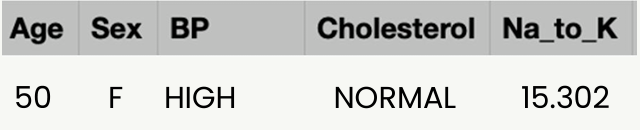

In [23]:
X_test = pd.DataFrame({
    'Age': [50], 
    'Sex': ['F'],
    'BP': ['HIGH'],
    'Cholesterol': ['NORMAL'], 
    'Na_to_K': [15.302]
})



X_test

,Age,Sex,BP,Cholesterol,Na_to_K
0,50,F,HIGH,NORMAL,15.302


In [24]:
model.predict(preprocess_pipeline.transform(X_test))

array(['drugY'], dtype=object)

Se recomienda el medicamento `Y`.